In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def k_means_clustering(dataset, num_clusters):
  #Removing last column (Species) and store it for later
  species=dataset.iloc[:,-1]
  dataset=dataset.iloc[:,:-1]

  #Converting dataset to numpy array
  data=dataset.values

  #initialising centroids randomly
  np.random.seed(42)
  centroids=data[np.random.choice(data.shape[0], num_clusters,replace=False)]

  #initialising cluster assignments and distances
  clusters=np.zeros(data.shape[0])
  distances=np.zeros(num_clusters)

  #Perform iterations until convergence
  converged=False
  while not converged:
    for i in range(data.shape[0]):
      for j in range (num_clusters):
        distances[j]=np.linalg.norm(data[i]-centroids[j])
      #assigning data pt to the cluster with min distance
      clusters[i]=np.argmin(distances)
    #updating centroids based on mean of the assigned data pts
    new_centroids=np.array([data[clusters==k].mean(axis=0) for k in range(num_clusters)])

    #checking for convergence
    if np.all(centroids==new_centroids):
      converged=True
    else:
      centroids=new_centroids
      
  return clusters,species

In [ ]:
def principal_component_analysis(dataset):
    # Remove the last column (Species) and store it for future comparison
    species = dataset.iloc[:, -1]
    dataset = dataset.iloc[:, :-1]

    # Convert the dataset to a NumPy array
    data = dataset.values

    # Calculate the covariance matrix
    cov_matrix = np.cov(data.T)

    # Calculate the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)

    # Extract the first three eigenvectors
    first_three_eigenvectors = np.vstack((eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1]))

    # Transform the data into the new feature space
    transformed_data = np.dot(data, first_three_eigenvectors.T)

    return transformed_data, eigenvalues[:3]

In [ ]:
#Load Iris dataset
iris_dataset=pd.read_csv('/content/Iris Dataset.csv')

In [ ]:
pd.DataFrame(iris_dataset)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Apply Kmeans Clustering
clusters,species=k_means_clustering(iris_dataset,3)

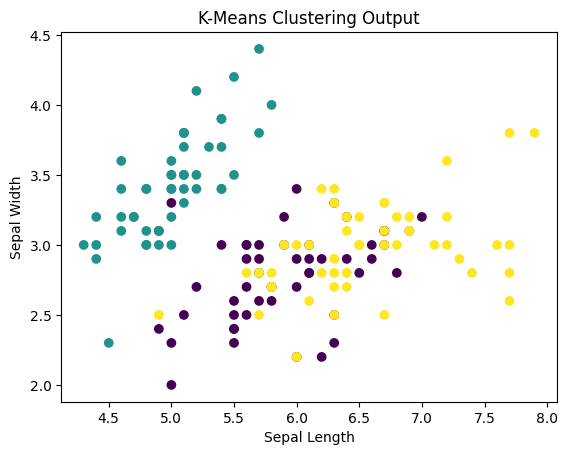

In [ ]:
# Plot the output of the cluster
plt.scatter(iris_dataset['SepalLengthCm'], iris_dataset['SepalWidthCm'], c=clusters)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering Output')
plt.show()

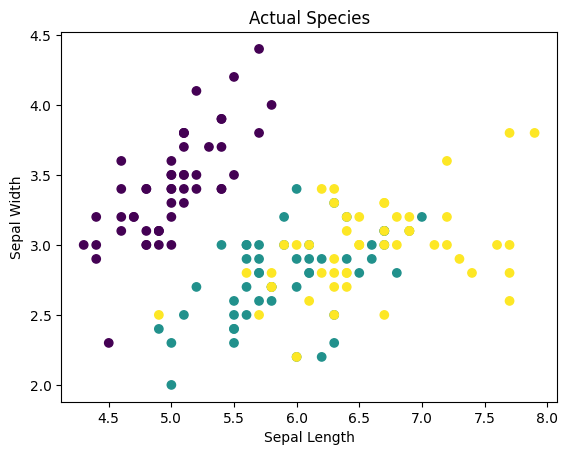

In [ ]:
# Plot the actual species
plt.scatter(iris_dataset['SepalLengthCm'], iris_dataset['SepalWidthCm'], c=iris_dataset['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual Species')
plt.show()

In [ ]:
# Apply Principal Component Analysis
transformed_data, eigenvalues = principal_component_analysis(iris_dataset)

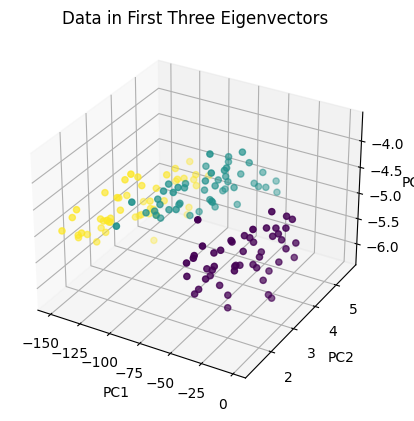

In [ ]:
# Plot the data in the first three eigenvectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=iris_dataset['Species'].astype('category').cat.codes)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Data in First Three Eigenvectors')
plt.show()

In [ ]:
# Print the eigenvalues for the corresponding eigenvectors
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

Eigenvalues:
Eigenvalue 1: 1890.7809830163478
Eigenvalue 2: 0.9732866317855803
Eigenvalue 3: 0.22299472861272301
